# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name:Mohga Aly Elbarbary

ID:55-1706

Tutorial:4

---

Name:Yara Ahmed Eassa

ID:55-12320

Tutorial:04


---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |



## Importing Libraries \& Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2024/refs/heads/main/data/car_prices.csv')

df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [ ]:
df.tail()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)
46577,2013,Kia,Rio,LX,Sedan,automatic,knadm4a32d6164825,ga,4.1,49953.0mi,silver,black,kia motors finance,$9300,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)


here we print the last five rows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  object 
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  object 
 14  saledate      46578 non-null  object 
dtypes: float64(1), int64(1), object(13)
memory usage: 5.3+ MB


we used df.info to undesrtand columns,data types and their null count

In [ ]:
df.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


we used this method to know the missing values in all columns

In [ ]:
df.describe()


,year,condition
count,46578.000000,46578.000000
mean,2010.203401,3.424265
std,3.831316,0.944009
min,1990.000000,1.000000
25%,2008.000000,2.700000
50%,2012.000000,3.600000
75%,2013.000000,4.200000
max,2015.000000,5.000000


we used this method to have an overview of the data and how it is distributed

In [ ]:
df.isnull().head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


by using this method , it  was provem again that there are no missing values since this method returns either true or false and fasle means there are no null values which means no missing values


In [ ]:
df.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
46573,0
46574,0
46575,0
46576,0


gets missing values in rows




In [ ]:
df.duplicated().sum()

0

We were tryng to see if there are duplicate rows

In [ ]:
df['make'].value_counts().head(3)


,count
make,
Ford,7871
Chevrolet,5322
Nissan,4297


These are the top 3 popular brands

In [ ]:
df.shape


(46578, 15)

Checking on the size of data set interms of rows and columns

In [ ]:

df['make'].unique()



array(['Hyundai', 'Toyota', 'Lexus', 'BMW', 'Ford', 'Kia', 'Chevrolet',
       'Cadillac', 'Mercedes-Benz', 'Jeep', 'Infiniti', 'Lincoln',
       'Mazda', 'Chrysler', 'GMC', 'Honda', 'Dodge', 'Audi', 'Nissan',
       'Buick', 'MINI', 'Jaguar', 'Volvo', 'Mitsubishi', 'Volkswagen',
       'Subaru', 'Porsche', 'Isuzu', 'Saturn', 'Pontiac', 'Scion',
       'Acura', 'Ram', 'Land Rover', 'Suzuki', 'Mercury', 'HUMMER',
       'Saab', 'Maserati', 'FIAT', 'Geo', 'smart', 'Oldsmobile', 'Fisker',
       'Bentley', 'Plymouth', 'Ferrari', 'Aston Martin'], dtype=object)

We were trying to see the unique values in cloumn make to know if it needs cleaning

In [ ]:
df['trim'].unique()

array(['GLS', 'SR5', 'Base', ..., 'Base PZEV', 'Natural Gas',
       '10th Anniversary'], dtype=object)

here we checked the make brands to see if there are inconsistencies but all of them are unique so no action is needed


In [ ]:
df['transmission'].unique()


array(['automatic', 'manual'], dtype=object)

The transmission column has no inconsistencies so no action is needed too

In [ ]:
df['body'].unique()


array(['sedan', 'SUV', 'Sedan', 'E-Series Van', 'Crew Cab', 'suv',
       'G Sedan', 'Wagon', 'Regular Cab', 'Double Cab', 'wagon', 'Coupe',
       'Minivan', 'SuperCrew', 'coupe', 'convertible', 'Extended Cab',
       'Hatchback', 'van', 'hatchback', 'Van', 'Convertible', 'SuperCab',
       'g sedan', 'king cab', 'G Convertible', 'King Cab', 'extended cab',
       'quad cab', 'supercab', 'Beetle Convertible', 'minivan', 'G Coupe',
       'Quad Cab', 'crew cab', 'supercrew', 'CrewMax Cab', 'double cab',
       'g coupe', 'Club Cab', 'Access Cab', 'Genesis Coupe',
       'e-series van', 'G37 Convertible', 'Cab Plus 4', 'crewmax cab',
       'genesis coupe', 'promaster cargo van', 'access cab', 'Mega Cab',
       'Koup', 'regular cab', 'mega cab', 'Elantra Coupe',
       'Q60 Convertible', 'regular-cab', 'Promaster Cargo Van', 'Xtracab',
       'CTS Coupe', 'CTS Wagon', 'GranTurismo Convertible',
       'beetle convertible', 'TSX Sport Wagon', 'g convertible',
       'tsx sport wagon', '

All the values has suplicates one of them is upper case laters and the other is lower case so this requires cleaning


In [ ]:
df['model'].unique()

array(['Sonata', '4Runner', 'IS 250', 'X5', 'E-Series Van', 'Optima',
       'Avalanche', 'CTS', 'E-Class', 'Forte', 'Wrangler', 'G Sedan',
       'MKS', 'Soul', 'Ranger', 'Mazda6', 'Tundra', 'PT Cruiser',
       'Acadia', 'Mustang', 'Odyssey', 'X3', 'STS', 'F-150', 'Sienna',
       'Liberty', 'DTS', 'Sebring', 'Nitro', 'Tacoma', 'Elantra', 'Q7',
       'Maxima', 'Corvette', 'Grand Cherokee', 'FJ Cruiser', 'Fiesta',
       'Genesis', 'Town and Country', 'F-350 Super Duty', 'Z4', 'Murano',
       'Enclave', 'Altima', 'Sentra', 'R-Class', 'Sierra 1500', 'Cooper',
       'XJ', 'Edge', 'Focus', 'Avenger', 'Civic', 'Escape', 'Camry',
       'Encore', 'Accord', 'Sonic', 'Yukon', 'XF', 'Savana Cargo',
       'Fusion', '200', 'Cruze', 'MKX', 'Stratus', 'S60', 'Taurus',
       'Corolla', 'CR-V', 'Tucson', 'Charger', 'Lancer', 'Malibu',
       'Mazda3', 'Jetta', 'Elantra GT', '3 Series', 'Leaf',
       'Express Cargo', 'Outlander Sport', 'Venza', 'F-250 Super Duty',
       'Versa', 'Rogue', 'Imp

We were trying to see the unique values in cloumn model to know if it needs cleaning

overview of values in model column


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [ ]:
df['odometer'] = df['odometer'].str.replace('mi', '', regex=True)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')
df['sellingprice'] = df['sellingprice'].replace({'\$': '', ',': ''}, regex=True)
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')
print(df[df['odometer'].isnull() | df['sellingprice'].isnull()])

Empty DataFrame
Columns: [year, make, model, trim, body, transmission, vin, state, condition, odometer, color, interior, seller, sellingprice, saledate]
Index: []


We removed the mi in odometer values and the $ from selling price values then converted these columns to float instead of object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          46578 non-null  int64  
 1   make          46578 non-null  object 
 2   model         46578 non-null  object 
 3   trim          46578 non-null  object 
 4   body          46578 non-null  object 
 5   transmission  46578 non-null  object 
 6   vin           46578 non-null  object 
 7   state         46578 non-null  object 
 8   condition     46578 non-null  float64
 9   odometer      46578 non-null  float64
 10  color         46578 non-null  object 
 11  interior      46578 non-null  object 
 12  seller        46578 non-null  object 
 13  sellingprice  46578 non-null  int64  
 14  saledate      46578 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.3+ MB


In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


here we removed the $ in price and mi in odometer so that it can see data as numerical and correct


In [ ]:

df.rename(columns={'odometer': 'odometer (mi)', 'sellingprice': 'sellingprice ($)'}, inplace=True)

print(df.head())

   year     make         model   trim          body transmission  \
0  2013  Hyundai        Sonata    GLS         sedan    automatic   
1  2014   Toyota       4Runner    SR5           SUV    automatic   
2  2012    Lexus        IS 250   Base         Sedan    automatic   
3  2002      BMW            X5   4.4i           SUV    automatic   
4  2014     Ford  E-Series Van  E-250  E-Series Van    automatic   

                 vin state  condition  odometer (mi)   color interior  \
0  5npeb4acxdh702805    ma        3.9        50404.0   black     gray   
1  jtezu5jr2e5064567    fl        4.9        17846.0    gray        —   
2  jthbf5c24c5168599    fl        4.1        21122.0  silver    black   
3  5uxfb33562lh33864    fl        1.9       145303.0   black    black   
4  1ftne2ew0eda31832    wa        4.9         6714.0   white     gray   

                             seller  sellingprice ($)  \
0             the hertz corporation             10900   
1  award auto sales and leasing inc   

we added the mi to the odometer and $ to selling price to show the unit each of them is measured in

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46578 entries, 0 to 46577
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              46578 non-null  int64  
 1   make              46578 non-null  object 
 2   model             46578 non-null  object 
 3   trim              46578 non-null  object 
 4   body              46578 non-null  object 
 5   transmission      46578 non-null  object 
 6   vin               46578 non-null  object 
 7   state             46578 non-null  object 
 8   condition         46578 non-null  float64
 9   odometer (mi)     46578 non-null  float64
 10  color             46578 non-null  object 
 11  interior          46578 non-null  object 
 12  seller            46578 non-null  object 
 13  sellingprice ($)  46578 non-null  int64  
 14  saledate          46578 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.3+ MB


In [ ]:
print(df.isnull().sum())

year                0
make                0
model               0
trim                0
body                0
transmission        0
vin                 0
state               0
condition           0
odometer (mi)       0
color               0
interior            0
seller              0
sellingprice ($)    0
saledate            0
dtype: int64


Checking on any missing values

In [ ]:
df['make'] = df['make'].str.lower().str.strip()
df['model'] = df['model'].str.lower().str.strip()
df['trim'] = df['trim'].str.lower().str.strip()
df['body'] = df['body'].str.lower().str.strip()
df['transmission'] = df['transmission'].str.lower().str.strip()
print(df['body'].unique())

['sedan' 'suv' 'e-series van' 'crew cab' 'g sedan' 'wagon' 'regular cab'
 'double cab' 'coupe' 'minivan' 'supercrew' 'convertible' 'extended cab'
 'hatchback' 'van' 'supercab' 'king cab' 'g convertible' 'quad cab'
 'beetle convertible' 'g coupe' 'crewmax cab' 'club cab' 'access cab'
 'genesis coupe' 'g37 convertible' 'cab plus 4' 'promaster cargo van'
 'mega cab' 'koup' 'elantra coupe' 'q60 convertible' 'regular-cab'
 'xtracab' 'cts coupe' 'cts wagon' 'granturismo convertible'
 'tsx sport wagon' 'cts-v coupe' 'q60 coupe' 'transit van']


Converted all the values to be lower case.For example if we have suv and SUV they were seen as different unique values but they are the same.

In [ ]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mi),color,interior,seller,sellingprice ($),saledate
0,2013,hyundai,sonata,gls,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,toyota,4runner,sr5,suv,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,—,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,lexus,is 250,base,sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,bmw,x5,4.4i,suv,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,ford,e-series van,e-250,e-series van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
df['color'].unique()

array(['black', 'gray', 'silver', 'white', 'blue', 'burgundy', 'beige',
       'gold', 'green', 'red', 'purple', '—', 'yellow', 'brown',
       'turquoise', 'orange', 'off-white', 'charcoal', 'pink', 'lime'],
      dtype=object)

We wanted to see the values in the column to know what needs to be cleaned

we were checking on colour column to check the irrelevant values to replace it

In [ ]:

color_mode = df['color'].mode()[0]
df['color'] = df['color'].replace('—', color_mode)
interior_mode = df['interior'].mode()[0]
df['interior'] = df['interior'].replace('—', interior_mode)
print(df[['color', 'interior']].head())




    color interior
0   black     gray
1    gray    black
2  silver    black
3   black    black
4   white     gray


We removed the - from colour and interior and replaced it with mode

In [ ]:
df['interior'].unique()

array(['gray', 'black', 'beige', 'tan', 'red', 'blue', 'brown',
       'off-white', 'silver', 'orange', 'purple', 'white', 'gold',
       'burgundy', 'green', 'yellow'], dtype=object)

Checking that it got removed

In [ ]:
df['body'].unique()

array(['sedan', 'suv', 'e-series van', 'crew cab', 'g sedan', 'wagon',
       'regular cab', 'double cab', 'coupe', 'minivan', 'supercrew',
       'convertible', 'extended cab', 'hatchback', 'van', 'supercab',
       'king cab', 'g convertible', 'quad cab', 'beetle convertible',
       'g coupe', 'crewmax cab', 'club cab', 'access cab',
       'genesis coupe', 'g37 convertible', 'cab plus 4',
       'promaster cargo van', 'mega cab', 'koup', 'elantra coupe',
       'q60 convertible', 'regular-cab', 'xtracab', 'cts coupe',
       'cts wagon', 'granturismo convertible', 'tsx sport wagon',
       'cts-v coupe', 'q60 coupe', 'transit van'], dtype=object)

Trying to inspect the values to limit them to the 8 identified ones

In [ ]:

def map_body_type(body):

    body = body.lower()


    if 'sedan' in body or 'g sedan' in body:
        return 'Sedan'
    elif 'coupe' in body or 'g coupe' in body or 'genesis coupe' in body or 'elantra coupe' in body or 'cts coupe' in body or 'cts-v coupe' in body or 'q60 coupe' in body or 'koup' in body:
        return 'Coupe'
    elif 'convertible' in body or 'g convertible' in body or 'beetle convertible' in body or 'g37 convertible' in body or 'q60 convertible' in body or 'granturismo convertible' in body:
        return 'Convertible'
    elif 'hatchback' in body:
        return 'Hatchback'
    elif 'suv' in body:
        return 'SUV'
    elif 'minivan' in body or 'van' in body or 'e-series van' in body or 'promaster cargo van' in body or 'transit van' in body:
        return 'Minivan'
    elif 'wagon' in body or 'tsx wagon' in body or 'tsx sport wagon' in body or 'cts wagon' in body:
        return 'Wagon'
    elif 'crew cab' in body or 'extended cab' in body or 'regular-cab' in body or'regular cab' in body or 'double cab' in body or 'supercab' in body or 'king cab' in body or 'quad cab' in body or 'mega cab' in body or 'club cab' in body or 'access cab' in body or 'crewmax cab' in body or 'cab plus 4' in body or 'supercrew' in body or 'xtracab' in body or 'pickup' in body:
        return 'Pickup Truck'
    else:
        return body

df['body'] = df['body'].apply(map_body_type)
df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

Converting them

In [ ]:
df['body'].value_counts()

,count
body,
Sedan,21574
SUV,11936
Pickup Truck,3977
Minivan,2632
Hatchback,2270
Coupe,1787
Wagon,1438
Convertible,964


In [ ]:
df['body'].unique()

array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

Checking if they were actually converted to the 8 types stated only

In [ ]:
df['body'].unique()


array(['Sedan', 'SUV', 'Minivan', 'Pickup Truck', 'Wagon', 'Coupe',
       'Convertible', 'Hatchback'], dtype=object)

In [ ]:
df['make'].unique()

array(['hyundai', 'toyota', 'lexus', 'bmw', 'ford', 'kia', 'chevrolet',
       'cadillac', 'mercedes-benz', 'jeep', 'infiniti', 'lincoln',
       'mazda', 'chrysler', 'gmc', 'honda', 'dodge', 'audi', 'nissan',
       'buick', 'mini', 'jaguar', 'volvo', 'mitsubishi', 'volkswagen',
       'subaru', 'porsche', 'isuzu', 'saturn', 'pontiac', 'scion',
       'acura', 'ram', 'land rover', 'suzuki', 'mercury', 'hummer',
       'saab', 'maserati', 'fiat', 'geo', 'smart', 'oldsmobile', 'fisker',
       'bentley', 'plymouth', 'ferrari', 'aston martin'], dtype=object)

In [ ]:

df['transmission'].unique()


array(['automatic', 'manual'], dtype=object)

In [ ]:
df['trim'].unique()

array(['gls', 'sr5', 'base', ..., 'base pzev', 'natural gas',
       '10th anniversary'], dtype=object)

In [ ]:
df['state'].unique()

array(['ma', 'fl', 'wa', 'co', 'ca', 'il', 'nv', 'mo', 'tx', 'ne', 'md',
       'nj', 'la', 'ny', 'nc', 'ut', 'va', 'ga', 'tn', 'oh', 'ms', 'pa',
       'or', 'mi', 'wi', 'az', 'pr', 'mn', 'in', 'hi', 'sc', 'ok', 'nm',
       'al'], dtype=object)

In [ ]:
df['vin'].unique()

array(['5npeb4acxdh702805', 'jtezu5jr2e5064567', 'jthbf5c24c5168599', ...,
       'wba3a5c56df356614', '4t1bf1fk8du254684', 'knadm4a32d6164825'],
      dtype=object)

In [ ]:
df['condition'].unique()

array([3.9, 4.9, 4.1, 1.9, 4.6, 3.6, 1.7, 5. , 4.4, 2.7, 1. , 4.2, 2.5,
       3.5, 4. , 3. , 3.1, 2.4, 4.7, 4.5, 3.3, 2.9, 3.4, 2.8, 2.1, 4.3,
       2.3, 3.7, 3.2, 2. , 2.2, 2.6, 3.8, 4.8, 1.4, 1.6, 1.1, 1.8, 1.3,
       1.5, 1.2])

In [ ]:
df['odometer (mi)'].unique()

array([50404., 17846., 21122., ..., 45357., 43376., 49953.])

In [ ]:
df['seller'].unique()

array(['the hertz corporation', 'award auto sales and leasing inc',
       'lexus financial services', ..., 'bmw of fresno',
       'my mint car corp', 'carter federal credit union'], dtype=object)

In [ ]:
df['sellingprice ($)'].unique()

array([ 10900,  29900,  24200,   3200,  22100,  15500,  13600,  14700,
        20000,  27500,  22250,  23700,  12000,   3700,   5500,   7300,
          800,  18000,  12500,   8900,  36500,   5900,  16300,  17800,
         8300,   3000,    700,   5100,  23000,   9100,  40250,  17900,
        51000,  20600,  12900,   9200,  19600,  18900,  25000,   8600,
        20900,  28750,  31700,  11900,   1250,   6700,   8200,   2800,
        27000,  21300,   9500,  13200,  11400,   8700,  11200,  13700,
        17000,  22300,   5200,   3400,  19800,   1100,  19000,   7500,
         2100,  19300,  12800,   8000,  11600,  13900,   9000,   8400,
         4800,  15700,  15000,  14400,  20400,  14600,  34000,  13750,
         8500,  10300,  10600,  10000,   1300,  30000,   6200,  25500,
        12100,  11000,  22800,  44250,   7100,  12600,  17600,   9800,
        23500,  43900,  10800,   7600,  13100,   3100,  32000,  32800,
         2400,  20500,  10700,   3800,  14300,   4200,   2000,    900,
      

We were inspecting all the remaining columns to check if something needs to get cleaned

here we checked and converted the datatypes of columns selling price and odometer to be float rather than object

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

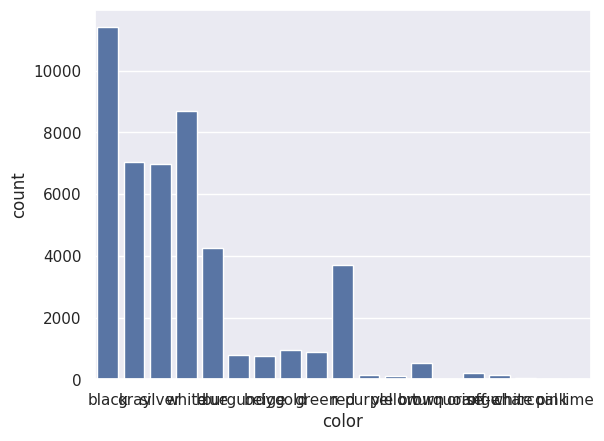

In [ ]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

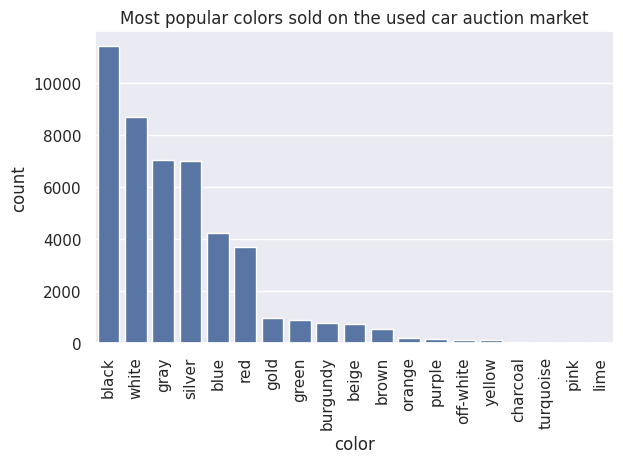

In [ ]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

([0, 1, 2, 3, 4],
 [Text(0, 0, 'ford'),
  Text(1, 0, 'chevrolet'),
  Text(2, 0, 'nissan'),
  Text(3, 0, 'toyota'),
  Text(4, 0, 'dodge')])

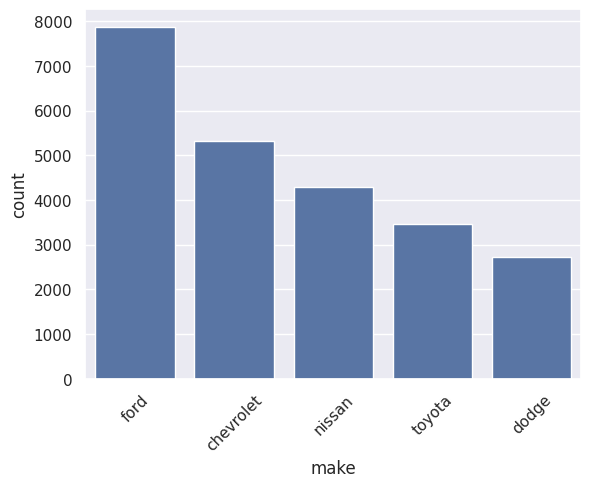

In [ ]:
popular_brands = df['make'].value_counts().head()
sns.countplot(x='make', data=df, order=popular_brands.index)
plt.xticks(rotation=45)

**Answer for Q1**: According to the above figure , the top 3 brands are ford,  
 chevorlet, nissan

**Q2: Do automatic cars, on average, sell for a higher price than manual cars?**


**Visualization**

<Axes: xlabel='transmission', ylabel='sellingprice ($)'>

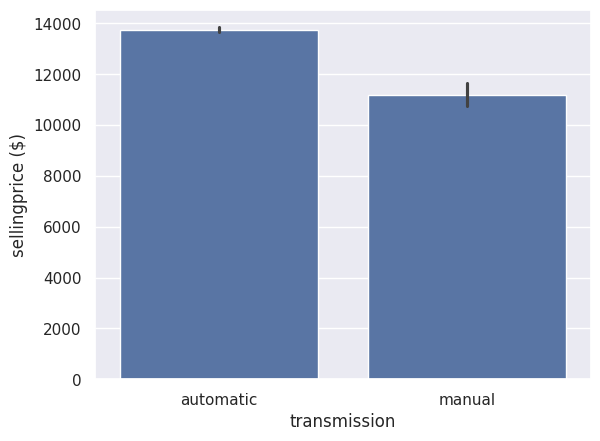

In [ ]:
sns.barplot(x='transmission', y='sellingprice ($)', data=df, estimator=np.mean)

**Answer for Q2**: According to the figure , automatic cars sell for a higher price on average (mean)

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'hyundai'),
  Text(1, 0, 'toyota'),
  Text(2, 0, 'lexus'),
  Text(3, 0, 'bmw'),
  Text(4, 0, 'ford'),
  Text(5, 0, 'kia'),
  Text(6, 0, 'chevrolet'),
  Text(7, 0, 'cadillac'),
  Text(8, 0, 'mercedes-benz'),
  Text(9, 0, 'jeep'),
  Text(10, 0, 'infiniti'),
  Text(11, 0, 'lincoln'),
  Text(12, 0, 'mazda'),
  Text(13, 0, 'chrysler'),
  Text(14, 0, 'gmc'),
  Text(15, 0, 'honda'),
  Text(16, 0, 'dodge'),
  Text(17, 0, 'audi'),
  Text(18, 0, 'nissan'),
  Text(19, 0, 'buick'),
  Text(20, 0, 'mini'),
  Text(21, 0, 'jaguar'),
  Text(22, 0, 'volvo'),
  Text(23, 0, 'mitsubishi'),
  Text(24, 0, 'volkswagen'),
  Text(25, 0, 'subaru'),
  Text(26, 0, 'porsche'),
  Text(27, 0, 'isuzu'),
  Text(28, 0, 'saturn'),
  T

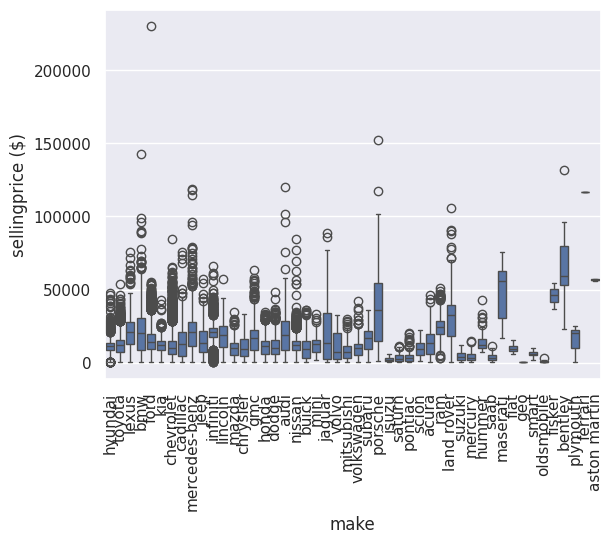

In [ ]:
sns.boxplot(x='make', y='sellingprice ($)', data=df);
plt.xticks(rotation=90)


**Answer for Q3**:According to the figure the highest two distributions are porsche and maserati
However, the highest two prices are porsche and bentley (by inspecting the maximum whisker of all brands)

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

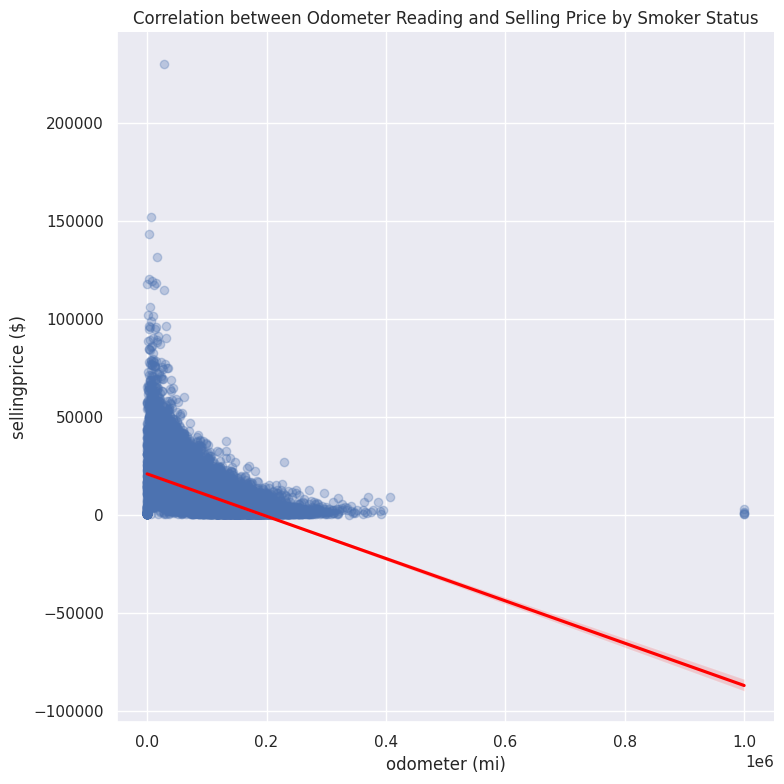

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x='odometer (mi)', y='sellingprice ($)', data=df , palette='magma', height=8, line_kws={'color': 'red'}, scatter_kws= {'alpha': 0.3})
plt.title('Correlation between Odometer Reading and Selling Price by Smoker Status')
plt.tight_layout()
plt.show()


<Axes: xlabel='odometer (mi)', ylabel='Count'>

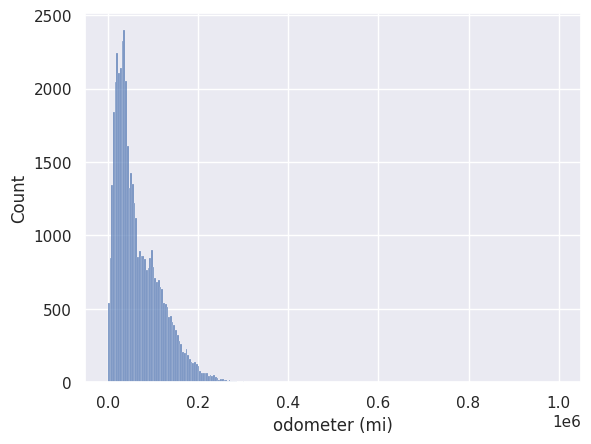

In [ ]:
sns.histplot(df['odometer (mi)'])

<Axes: xlabel='sellingprice ($)', ylabel='Count'>

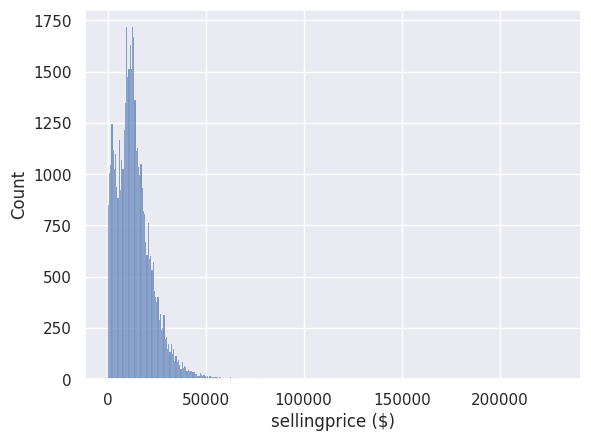

In [ ]:
sns.histplot(df['sellingprice ($)'])

**Answer for Q4**: They are negatively correlated

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

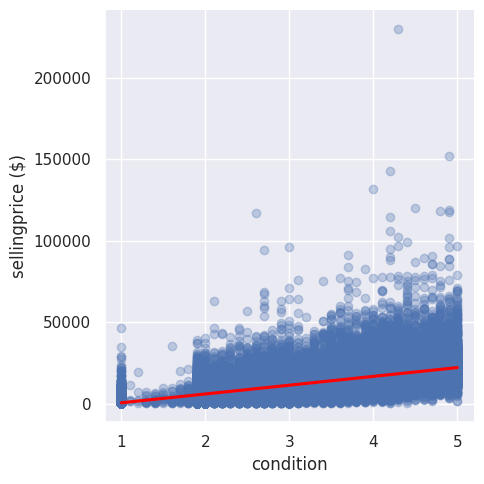

In [ ]:

sns.lmplot(x='condition', y='sellingprice ($)', data=df, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.3})
plt.tight_layout()
plt.show()

**Answer for Q5**: Slight positive correlation

**Q6: Are there differences in the average car price due to the car's body type? If so, rank their order and state the most expensive and least expensive car body type.**

**Visualization**

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Pickup Truck'),
  Text(1, 0, 'Convertible'),
  Text(2, 0, 'Coupe'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'Minivan'),
  Text(5, 0, 'Sedan'),
  Text(6, 0, 'Hatchback'),
  Text(7, 0, 'Wagon')])

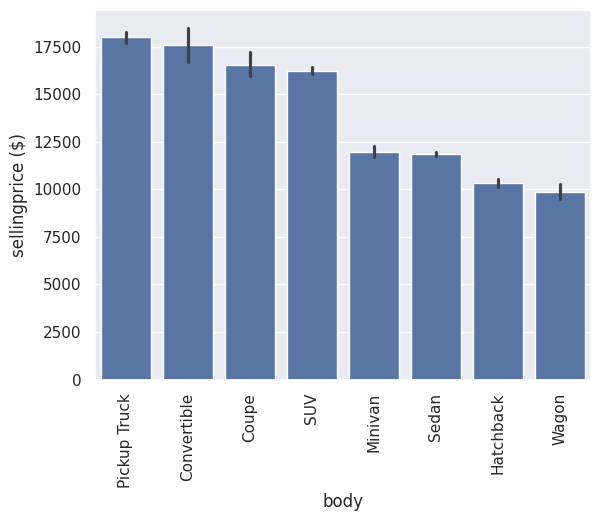

In [ ]:
sns.barplot(x='body', y='sellingprice ($)', data=df, estimator=np.mean, order=df.groupby('body')['sellingprice ($)'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90)

**Answer for Q6**: Yes it matters.The most expensive one is "Pickup Truck" and the least expensive one is "wagon"

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:

selected_columns = ['odometer (mi)', 'make', 'model', 'body', 'transmission', 'condition']
df_model = df[selected_columns + ['sellingprice ($)']]
df_model.head()

,odometer (mi),make,model,body,transmission,condition,sellingprice ($)
0,50404.0,hyundai,sonata,Sedan,automatic,3.9,10900
1,17846.0,toyota,4runner,SUV,automatic,4.9,29900
2,21122.0,lexus,is 250,Sedan,automatic,4.1,24200
3,145303.0,bmw,x5,SUV,automatic,1.9,3200
4,6714.0,ford,e-series van,Minivan,automatic,4.9,22100


We made a copy of data frame that includes only the columns we are intrested of adding to the model

In [ ]:
df_model.shape

(46578, 7)

In [ ]:
df_model = pd.get_dummies(df_model, columns=['make','model' ,'body', 'transmission'], drop_first=True)
df_model = df_model.astype(int)
print(df_model.head())


   odometer (mi)  condition  sellingprice ($)  make_aston martin  make_audi  \
0          50404          3             10900                  0          0   
1          17846          4             29900                  0          0   
2          21122          4             24200                  0          0   
3         145303          1              3200                  0          0   
4           6714          4             22100                  0          0   

   make_bentley  make_bmw  make_buick  make_cadillac  make_chevrolet  ...  \
0             0         0           0              0               0  ...   
1             0         0           0              0               0  ...   
2             0         0           0              0               0  ...   
3             0         1           0              0               0  ...   
4             0         0           0              0               0  ...   

   model_zdx  model_zephyr  body_Coupe  body_Hatchback  body_M

Here we encoded the categorical columns make, body,model and trasmission using one hot encoding

In [ ]:
df_model.head()

,odometer (mi),condition,sellingprice ($),make_aston martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,...,model_zdx,model_zephyr,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,50404,3,10900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17846,4,29900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21122,4,24200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,145303,1,3200,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6714,4,22100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
normalize = ['odometer (mi)']
df_model[normalize] = (df_model[normalize] - df_model[normalize].min()) / (df_model[normalize].max() - df_model[normalize].min())
df_model.head()

,odometer (mi),condition,sellingprice ($),make_aston martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,...,model_zdx,model_zephyr,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,0.050403,3,10900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.017845,4,29900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.021121,4,24200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.145302,1,3200,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.006713,4,22100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Here we normalized the numerical column odometer

## Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = df_model.drop('sellingprice ($)',axis=1)
y = df_model['sellingprice ($)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

Here we applied the model , added all the columns of new data frame to indepndent variables and selling price is the dependent.

## Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = lin_reg.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) for reference
r2 = r2_score(y_test, y_pred)

# Print the RMSE and R-squared values
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 4758.224015048768
R-squared (R2): 0.7607199505447887


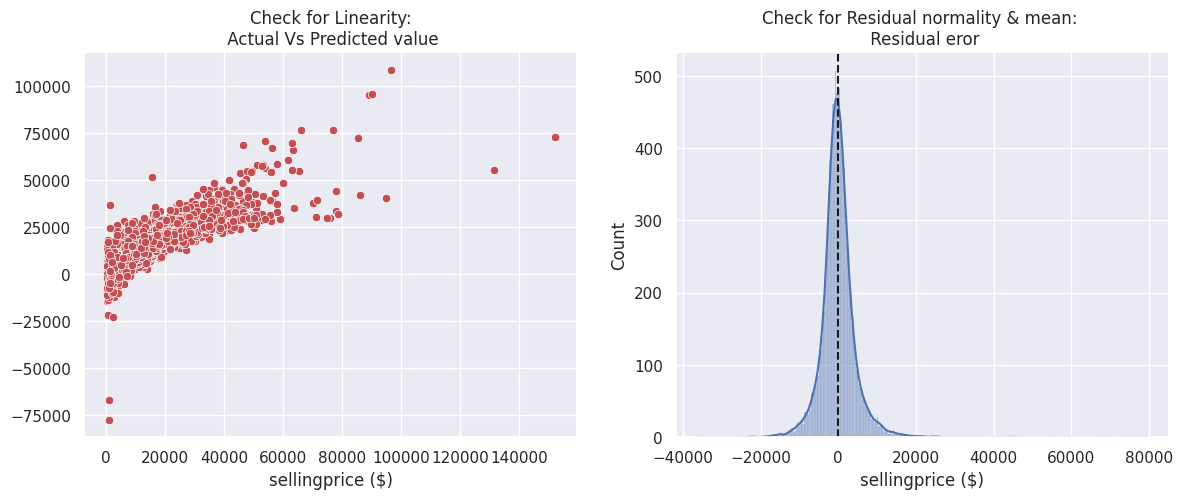

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

The plot is testing for linearity.For it to be linear it has to start from the buttom left to the top right however here it starts from the middle which shows that there might be some outliers or inconsistencies that caused it to have this shape.

For the second plot it is used to check the distribution of residuals and checks if they are normally distributed.They are almost normally distributed.

## Conclusion and Recommendations

Comment on the model accuracy and your findings from model evaluation and validation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: According to the RMSE calculated, the model predicts the selling price inacurately by 4758$ larger or smaller.
The R squared of our model is 0.76 which is a good prediction as it should be above 0.75. We believe that we are having this number because the data might be skewed due to presence of the outliers that we did not handle.We tried to do log to normailze the odometer and selling price column, however this lead to an over-fiited model with R-squared of 1. We suggest feature engineering, removing noise and outliers.For the feature engineering part, we suggest combining the model and year columns as they refer to its overall condition.
Finally, We recommend using our model but it still needs some enhancements.


# Bonus




### Checking for Outliers

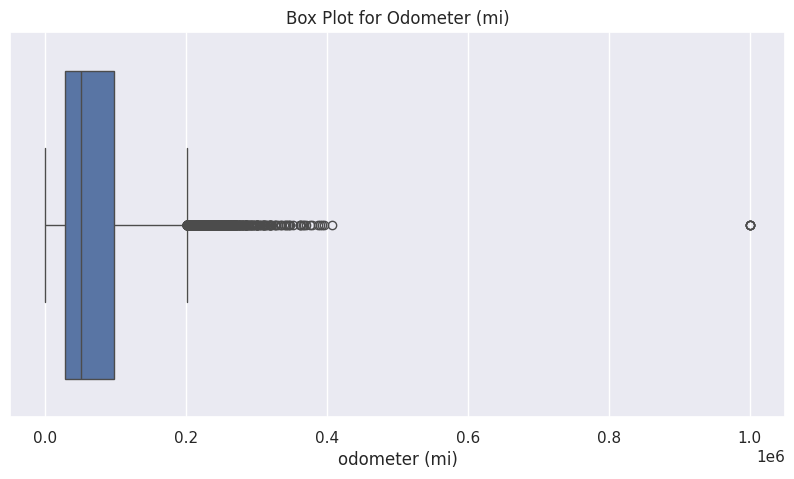

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['odometer (mi)'])
plt.title('Box Plot for Odometer (mi)')
plt.show()

We used a boxplot here to see if there is any outliers in the odometer as we believe it is most prone to having outliers and it is proved here, we used a boxplot to see the results because anything befond the whiskers is considered an outlier. There are alot of outliers on the right of the whiskers.

In [ ]:
import numpy as np

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'odometer (mi)'
Q1 = df['odometer (mi)'].quantile(0.25)
Q3 = df['odometer (mi)'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and count outliers in 'odometer (mi)' based on IQR method
odometer_outliers = df[(df['odometer (mi)'] < lower_bound) | (df['odometer (mi)'] > upper_bound)]
print(f"Number of outliers in 'odometer (mi)': {odometer_outliers.shape[0]}")


Number of outliers in 'odometer (mi)': 870


### Handling the Outliers

In [ ]:
import numpy as np
def impute_outliers_with_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    non_outlier_mean = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column].mean()
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), non_outlier_mean, df[column])
    return df
df_imputed = impute_outliers_with_iqr(df, 'odometer (mi)')
print(df_imputed[['odometer (mi)']].describe())


       odometer (mi)
count   46578.000000
mean    63593.861600
std     45263.890601
min         1.000000
25%     28185.000000
50%     51193.000000
75%     93248.750000
max    200560.000000


After seeing that the column has many outliers, we proceeded to impute them with the mean of the non outlier values using the IQR method to be consistent with our use of the boxplot.

In [ ]:
import numpy as np
Q1 = df['odometer (mi)'].quantile(0.25)
Q3 = df['odometer (mi)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
odometer_outliers = df[(df['odometer (mi)'] < lower_bound) | (df['odometer (mi)'] > upper_bound)]
print(f"Number of outliers in 'odometer (mi)': {odometer_outliers.shape[0]}")

Number of outliers in 'odometer (mi)': 321


Here we wanted to check if the number of outliers has reduced and it definetly did altough didnt remove them completely

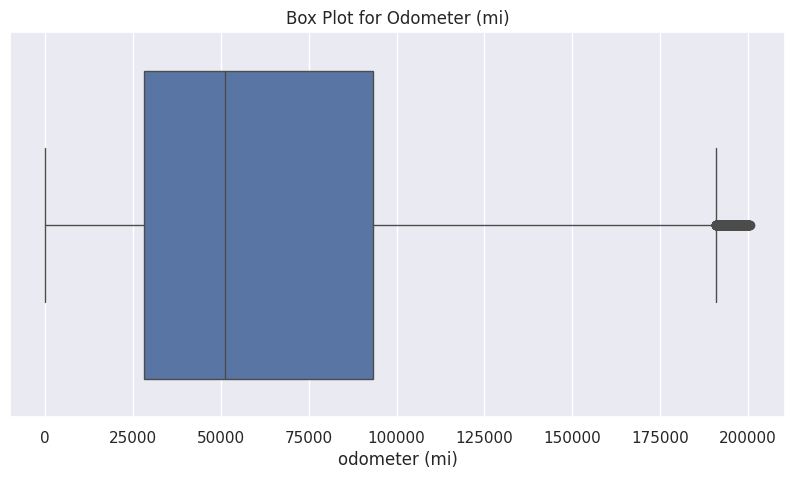

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['odometer (mi)'])
plt.title('Box Plot for Odometer (mi)')
plt.show()

As seen above, the number of outliers has decreased significantly.

### Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

In [ ]:
df_imputed.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer (mi),color,interior,seller,sellingprice ($),saledate
0,2013,hyundai,sonata,gls,Sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0,black,gray,the hertz corporation,10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,toyota,4runner,sr5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0,gray,black,award auto sales and leasing inc,29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,lexus,is 250,base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0,silver,black,lexus financial services,24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,bmw,x5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0,black,black,peddle llc,3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,ford,e-series van,e-250,Minivan,automatic,1ftne2ew0eda31832,wa,4.9,6714.0,white,gray,u-haul,22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


In [ ]:
selected_columns = ['odometer (mi)', 'make', 'model', 'body', 'transmission', 'condition']
df_model = df_imputed[selected_columns + ['sellingprice ($)']]
df_model.head()

,odometer (mi),make,model,body,transmission,condition,sellingprice ($)
0,50404.0,hyundai,sonata,Sedan,automatic,3.9,10900
1,17846.0,toyota,4runner,SUV,automatic,4.9,29900
2,21122.0,lexus,is 250,Sedan,automatic,4.1,24200
3,145303.0,bmw,x5,SUV,automatic,1.9,3200
4,6714.0,ford,e-series van,Minivan,automatic,4.9,22100


Just like before, we selected the columns we believe are relevant most to predicting car prices.

In [ ]:
df_model = pd.get_dummies(df_model, columns=['make','model' ,'body', 'transmission'], drop_first=True)
df_model = df_model.astype(int)
print(df_model.head())

   odometer (mi)  condition  sellingprice ($)  make_aston martin  make_audi  \
0          50404          3             10900                  0          0   
1          17846          4             29900                  0          0   
2          21122          4             24200                  0          0   
3         145303          1              3200                  0          0   
4           6714          4             22100                  0          0   

   make_bentley  make_bmw  make_buick  make_cadillac  make_chevrolet  ...  \
0             0         0           0              0               0  ...   
1             0         0           0              0               0  ...   
2             0         0           0              0               0  ...   
3             0         1           0              0               0  ...   
4             0         0           0              0               0  ...   

   model_zdx  model_zephyr  body_Coupe  body_Hatchback  body_M

Here we also applied one hot encoding to all the categorical values

In [ ]:
df_model.head()

,odometer (mi),condition,sellingprice ($),make_aston martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,...,model_zdx,model_zephyr,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,50404,3,10900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17846,4,29900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,21122,4,24200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,145303,1,3200,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6714,4,22100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Applied one hot encoding results

In [ ]:
normalize = ['odometer (mi)']
df_model[normalize] = (df_model[normalize] - df_model[normalize].min()) / (df_model[normalize].max() - df_model[normalize].min())
df_model.head()

,odometer (mi),condition,sellingprice ($),make_aston martin,make_audi,make_bentley,make_bmw,make_buick,make_cadillac,make_chevrolet,...,model_zdx,model_zephyr,body_Coupe,body_Hatchback,body_Minivan,body_Pickup Truck,body_SUV,body_Sedan,body_Wagon,transmission_manual
0,0.251313,3,10900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.088976,4,29900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.105311,4,24200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.724485,1,3200,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.033471,4,22100,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Finally, befor emodling, we have to normalize all numerical values, we only had odometer so we normalized it using the min max method. We didn't ntomalize selling price because we are not supposed to do that for dependent variables.

### Modelling

_Apply the linear regression model below._

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df_model.drop('sellingprice ($)',axis=1)
y = df_model['sellingprice ($)']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train);

Here we split the data into testing and learning and applied the linear regression model and trained it.

### Model Evaluation & Validation

_Evaluate the model you applied and check if it meets the necessary assumptions for the chosen model._

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Root Mean Squared Error (RMSE): 4741.038366025298
R-squared (R2): 0.7624452820084744


Here we tested the model for prediction and then we wanted to see how accurate it is by calculating the RMSE and R2. The RMSE has improved slightly to be 4741 which means the model is off for predicting prices by $4741. The R2 has also improved slightly to be 0.762

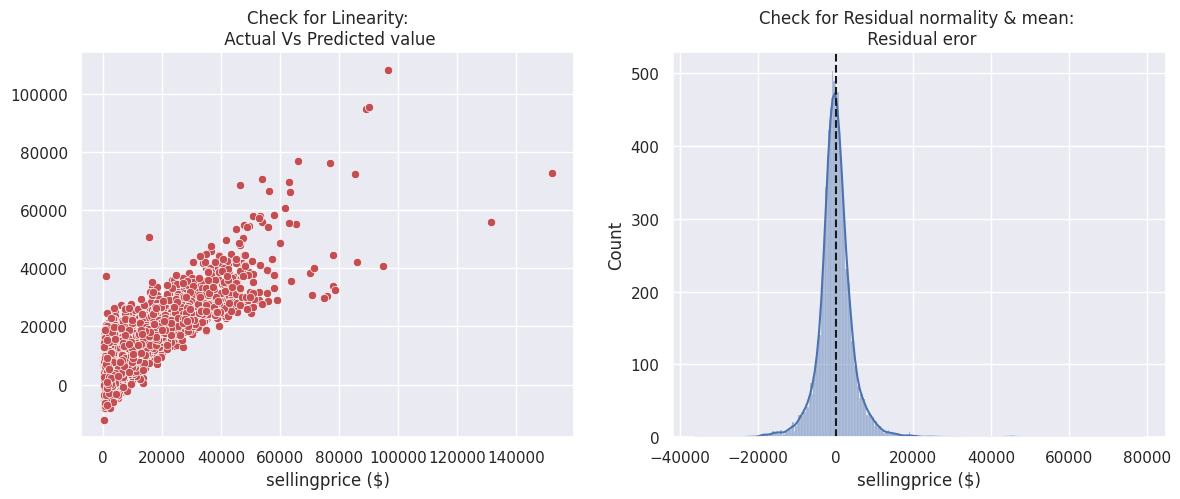

In [ ]:
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Here the linearity plot is taking the correct format (a diagonal from botoom left to top right) but here there are some scatters which could indicate that the model fails to account for some non linear relations

For the second plot it is used to check the distribution of residuals and the goal is that they should be normally distributed. Here the results are okay because most data is centered bs slightly skewed to the left.

### Conclusion and Recommendations


**Answer**: According to the RMSE calculated, the model is performing a little better but not to the extent of making a big difference. However, the model is considered good as it exceeds the baseline of 0.75 so we would definetly recommend the model to users. We believe the score could be enhanced by handling outliers from the selling price as well but that could create inaccuracies because id reduce the variability the model needs to learn from and i could have a biased model.